In [1]:
import pandas as pd
import plotly.express as px

In [2]:
profiles = {
    "ORF": "wellpos_cc_var_mad_outlier_featselect_sphering_harmony",
    "CRISPR": "wellpos_var_mad_int_featselect_harmony_PCA_corrected",
}

all_profiles = {
    "ORF": "wellpos_cc_var_mad_outlier_featselect_sphering_harmony",
    "ORF-CRISPR-pipeline": "wellpos_var_mad_int_featselect_harmony_PCA",
    "CRISPR": "wellpos_var_mad_int_featselect_harmony_PCA_corrected",
    "CRISPR-ORF-pipeline": "wellpos_cc_var_mad_outlier_featselect_sphering_harmony_PCA_corrected",
}

modality = {
    "ORF": "ORF",
    "CRISPR": "CRISPR",
    "ORF-CRISPR-pipeline": "ORF",
    "CRISPR-ORF-pipeline": "CRISPR",
}

pipeline = {
    "ORF": "Best pipeline",
    "CRISPR": "Best pipeline",
    "ORF-CRISPR-pipeline": "Other modality's pipeline",
    "CRISPR-ORF-pipeline": "Other modality's pipeline",
}

color_discrete_map = {
    "Best pipeline": "rgb(0, 114, 178)",
    "Other modality's pipeline": "rgb(213, 94, 0)",
}

Read phenotypic activity data

In [3]:
phenotypic_activity_df = pd.DataFrame()

for profile in profiles:
    df = pd.read_csv(f"output/phenotypic-activity-{profiles[profile]}.csv.gz")
    df["profile_type"] = profile
    df["modality"] = modality[profile]
    df["pipeline"] = pipeline[profile]
    phenotypic_activity_df = pd.concat(
        [phenotypic_activity_df, df], ignore_index=True, axis=0
    )

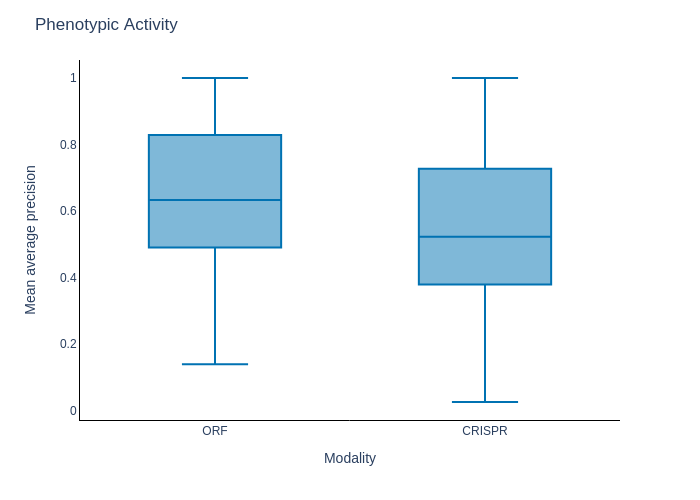

In [4]:
fig = px.box(
    phenotypic_activity_df,
    x="modality",
    y="mean_average_precision",
    color="pipeline",
    color_discrete_map=color_discrete_map,
).update_layout(
    title="Phenotypic Activity",
    xaxis=dict(title="Modality", linecolor="black"),
    yaxis=dict(title="Mean average precision", linecolor="black"),
    plot_bgcolor="white",
    paper_bgcolor="white",
    showlegend=False,
)

fig.show("png")
fig.write_image("figures/phenotypic-activity-best-profiles.png", height=480, width=640, scale=2)
fig.write_image("figures/phenotypic-activity-best-profiles.svg", height=480, width=640, scale=2)

In [5]:
fraction_retrieved = (
    phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum() / len(x))
    .reset_index()
    .rename(columns={"below_corrected_p": "fraction_retrieved"})
)

print(fraction_retrieved.to_markdown(index=False))

| profile_type   |   fraction_retrieved |
|:---------------|---------------------:|
| CRISPR         |             0.713121 |
| ORF            |             0.568964 |


In [6]:
n_retrieved = (
    phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum())
    .reset_index()
    .rename(columns={"below_corrected_p": "n_retrieved"})
)

print(n_retrieved.to_markdown(index=False))

| profile_type   |   n_retrieved |
|:---------------|--------------:|
| CRISPR         |          5685 |
| ORF            |          7817 |


In [7]:
all_phenotypic_activity_df = pd.DataFrame()

for profile in all_profiles:
    df = pd.read_csv(f"output/phenotypic-activity-{all_profiles[profile]}.csv.gz")
    df["profile_type"] = profile
    df["modality"] = modality[profile]
    df["pipeline"] = pipeline[profile]
    all_phenotypic_activity_df = pd.concat(
        [all_phenotypic_activity_df, df], ignore_index=True, axis=0
    )

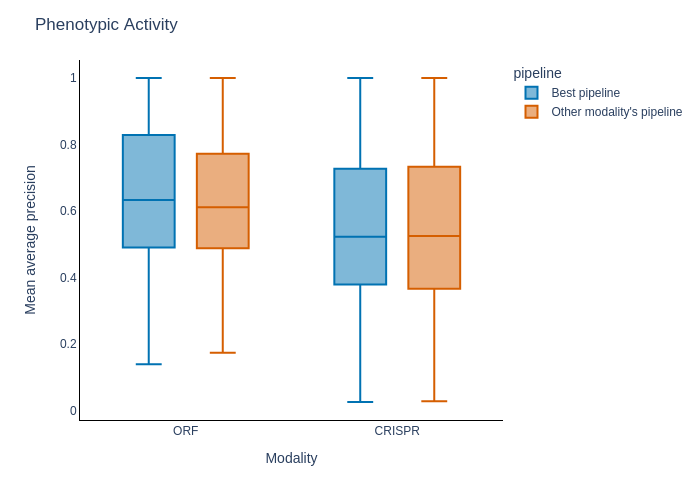

In [8]:
fig = px.box(
    all_phenotypic_activity_df,
    x="modality",
    y="mean_average_precision",
    color="pipeline",
    color_discrete_map=color_discrete_map,
).update_layout(
    title="Phenotypic Activity",
    xaxis=dict(title="Modality", linecolor="black"),
    yaxis=dict(title="Mean average precision", linecolor="black"),
    plot_bgcolor="white",
    paper_bgcolor="white",
)

fig.show("png")
fig.write_image("figures/phenotypic-activity-all-profiles.png", height=480, width=640, scale=2)
fig.write_image("figures/phenotypic-activity-all-profiles.svg", height=480, width=640, scale=2)

In [9]:
fraction_retrieved = (
    all_phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum() / len(x))
    .reset_index()
    .rename(columns={"below_corrected_p": "fraction_retrieved"})
)

print(fraction_retrieved.to_markdown(index=False))

| profile_type        |   fraction_retrieved |
|:--------------------|---------------------:|
| CRISPR              |             0.713121 |
| CRISPR-ORF-pipeline |             0.69581  |
| ORF                 |             0.568964 |
| ORF-CRISPR-pipeline |             0.508334 |


In [10]:
n_retrieved = (
    all_phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum())
    .reset_index()
    .rename(columns={"below_corrected_p": "n_retrieved"})
)

print(n_retrieved.to_markdown(index=False))

| profile_type        |   n_retrieved |
|:--------------------|--------------:|
| CRISPR              |          5685 |
| CRISPR-ORF-pipeline |          5547 |
| ORF                 |          7817 |
| ORF-CRISPR-pipeline |          6984 |
